In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import keras
import tensorflow as tf
import keras.utils

In [95]:
data = pd.read_csv("Airline_Delay_Cause.csv")

In [96]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [97]:
print(data.columns)


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [98]:
data = data.drop(['carrier', 'carrier_name', 'airport', 'airport_name'], axis=1)


In [99]:
def Value(x) :
  if x <=15 :
    return 0
  elif x <= 100 :
    return 1
  elif x <= 200 :
    return 2
  else :
    return 3


data['type'] = data['weather_delay'].apply(lambda x : Value(x))

In [100]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,type
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [101]:
data['type'].value_counts()

type
0    145848
1     69520
3     68745
2     33904
Name: count, dtype: int64

<Axes: >

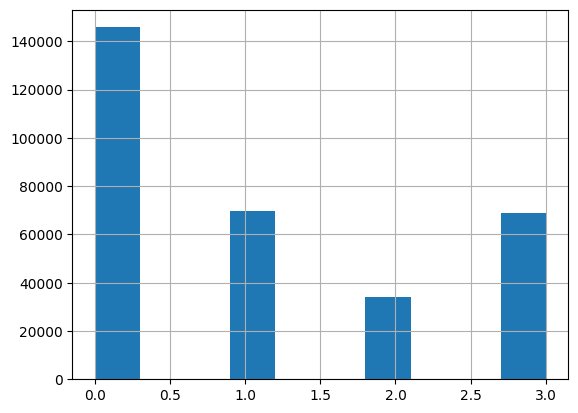

In [102]:
data['type'].hist()

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   arr_flights          317524 non-null  float64
 3   arr_del15            317285 non-null  float64
 4   carrier_ct           317525 non-null  float64
 5   weather_ct           317523 non-null  float64
 6   nas_ct               317529 non-null  float64
 7   security_ct          317529 non-null  float64
 8   late_aircraft_ct     317529 non-null  float64
 9   arr_cancelled        317529 non-null  float64
 10  arr_diverted         317527 non-null  float64
 11  arr_delay            317523 non-null  float64
 12  carrier_delay        317525 non-null  float64
 13  weather_delay        317529 non-null  float64
 14  nas_delay            317529 non-null  float64
 15  security_delay   

In [104]:
data.isnull().sum()

year                     0
month                    0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
type                     0
dtype: int64

In [105]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

In [106]:
data.isnull().sum()

year                   0
month                  0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
type                   0
dtype: int64

In [107]:
X = data.drop('type', axis=1)
y = data['type']

In [108]:
y.value_counts()

type
0    145848
1     69520
3     68745
2     33904
Name: count, dtype: int64

In [109]:
y

0         0
1         0
2         0
3         1
4         0
         ..
318012    2
318013    2
318014    0
318015    0
318016    3
Name: type, Length: 318017, dtype: int64

In [110]:
y_cat = tf.keras.utils.to_categorical(y)
y_cat

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (238512, 17)
X_test shape is  (79505, 17)
y_train shape is  (238512, 4)
y_test shape is  (79505, 4)


In [136]:
KerasModel = keras.models.Sequential([
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(4, activation = 'softmax')
])

In [137]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [138]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=50,
                         batch_size=50,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/50
4771/4771 [==============================] - 13s 3ms/step - loss: 0.9036 - accuracy: 0.6310 - val_loss: 0.5325 - val_accuracy: 0.7903
Epoch 2/50
4771/4771 [==============================] - 12s 3ms/step - loss: 0.5039 - accuracy: 0.8038 - val_loss: 0.3505 - val_accuracy: 0.8504
Epoch 3/50
4771/4771 [==============================] - 13s 3ms/step - loss: 0.3815 - accuracy: 0.8566 - val_loss: 0.2491 - val_accuracy: 0.8728
Epoch 4/50
4771/4771 [==============================] - 12s 3ms/step - loss: 0.3035 - accuracy: 0.8928 - val_loss: 0.2400 - val_accuracy: 0.9296
Epoch 5/50
4771/4771 [==============================] - 12s 3ms/step - loss: 0.2504 - accuracy: 0.9275 - val_loss: 0.1325 - val_accuracy: 0.9672
Epoch 6/50
4771/4771 [==============================] - 12s 3ms/step - loss: 0.2269 - accuracy: 0.9348 - val_loss: 0.1107 - val_accuracy: 0.9752
Epoch 7/50
4771/4771 [==============================] - 13s 3ms/step - loss: 0.2209 - accuracy: 0.9372 - val_loss: 0.2344 - val_ac

In [139]:
y_pred = KerasModel.predict(X_test)

2485/2485 [==============================] - 4s 2ms/step


In [140]:

ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2485/2485 [==============================] - 3s 1ms/step - loss: 0.0459 - accuracy: 0.9913
Model Loss is 0.045908376574516296
Model Accuracy is 0.9913339018821716


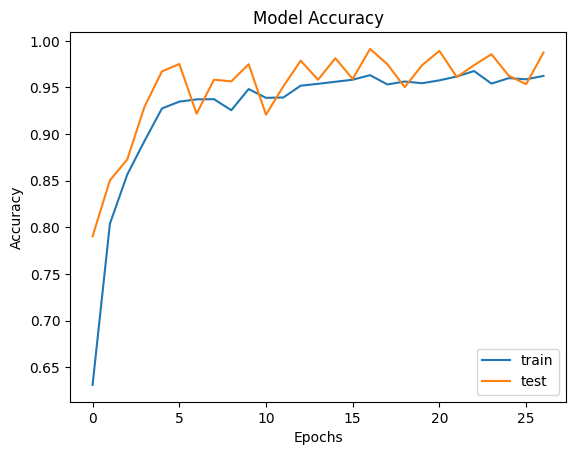

In [141]:
# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [145]:
train_loss, train_accuracy = KerasModel.evaluate(X_train, y_train, verbose=0)

test_loss, test_accuracy = KerasModel.evaluate(X_test, y_test, verbose=0)

print(f"Final Training Accuracy: {train_accuracy}")
print(f"Final Test Accuracy: {test_accuracy}")


Final Training Accuracy: 0.99097740650177
Final Test Accuracy: 0.9913339018821716


In [147]:
y_pred = KerasModel.predict(X_test)


2485/2485 [==============================] - 3s 1ms/step


In [153]:
new_y_pred = [np.argmax(i) for i in y_pred]
new_y_test = [np.argmax(i) for i in y_test]
print(new_y_pred)
print(new_y_test)

[3, 0, 0, 0, 0, 3, 3, 0, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 3, 0, 1, 0, 1, 1, 3, 1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 3, 3, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 2, 0, 1, 0, 3, 3, 0, 2, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 1, 3, 0, 0, 3, 0, 0, 2, 3, 1, 3, 0, 0, 1, 0, 3, 2, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 0, 0, 3, 0, 3, 0, 3, 3, 1, 3, 0, 0, 0, 0, 2, 0, 1, 1, 0, 3, 0, 1, 0, 3, 3, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 3, 1, 1, 3, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 1, 0, 0, 1, 0, 3, 1, 0, 3, 3, 1, 0, 3, 1, 3, 3, 1, 3, 0, 1, 3, 0, 0, 2, 3, 3, 2, 3, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 3, 2, 0, 1, 3, 1, 1, 0, 1, 0, 3, 0, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 3, 1, 3, 0, 2, 0, 3, 0, 3, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 2, 1, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 2, 0, 1, 0, 3, 1, 0, 0, 2, 2, 1, 3, 0, 2, 1, 0, 3, 1, 1, 1, 1, 0, 3, 1, 

In [152]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(new_y_test,new_y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36371
           1       0.99      0.99      0.99     17528
           2       0.99      0.94      0.97      8548
           3       0.98      1.00      0.99     17058

    accuracy                           0.99     79505
   macro avg       0.99      0.98      0.99     79505
weighted avg       0.99      0.99      0.99     79505



In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(new_y_test, new_y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[36293    78     0     0]
 [   34 17391   102     1]
 [    0    60  8074   414]
 [    0     0     0 17058]]


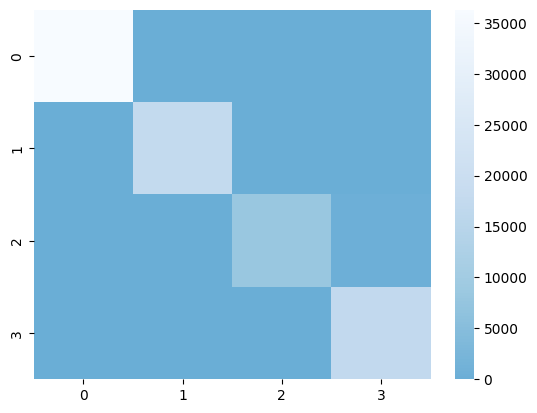

In [155]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [156]:
# save model
KerasModel.save('Airline_Delay_Cause.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
